In [1]:
!pip install netCDF4
!pip install xarray

     |████████████████████████████████| 4.7MB 6.1MB/s 
     |████████████████████████████████| 317kB 42.4MB/s 


In [2]:
url = 'http://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN_2016/OFAM/ocean_eta_t_2000_01.nc'
url2 = 'http://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN_2016/OFAM/atm_flux_diag_1994_01.nc'

In [3]:
import xarray,numpy as np

In [4]:
data = xarray.open_dataset(url2)

In [5]:
data = data.drop_vars(names=['Time','average_T1','average_T2','average_DT'])

In [6]:
data['rh_ref']

<xarray.DataArray 'rh_ref' (Time: 31, lat: 101, lon: 240)>
[751440 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 0.0 1.5 3.0 4.5 6.0 ... 352.5 354.0 355.5 357.0 358.5
  * lat      (lat) float64 -75.0 -73.5 -72.0 -70.5 -69.0 ... 70.5 72.0 73.5 75.0
Dimensions without coordinates: Time
Attributes:
    long_name:      relative humidity at 2 m
    units:          percent
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

In [7]:
arr = np.array(data['rh_ref'].data)

In [8]:
print(arr.shape)
print(arr[0][:1])

(31, 101, 240)
[[90.888725 90.42023  89.60714  88.77808  88.31096  88.38233  88.86842
  89.45574  89.85504  89.923485 89.66068  89.13935  88.459724 87.718094
  87.05616  86.66432  86.71288  87.26558  88.2087   89.309975 90.23807
  90.641914 90.2413   89.00042  87.23737  85.44022  83.986145 83.060936
  82.50312  82.32999  82.16427  75.71057  71.87281  71.422745 71.30586
  71.193245 75.86153  79.94523  81.6975   81.87574  82.05428  82.641975
  83.63067  85.2356   86.05241  84.57716  84.301094 84.00518  83.137405
  81.84469  80.1477   78.46604  77.20676  76.364334 76.08369  75.81092
  86.30615  91.61433  91.64617  91.68936  94.02322  95.01141  94.78011
  94.54322  94.34696  94.17879  94.02     93.85475  93.7246   93.67623
  93.73835  93.891655 94.02557  93.94699  93.46671  92.53551  91.33262
  90.153534 89.238594 88.65144  88.30603  88.09071  87.92598  87.81761
  87.81884  87.963394 88.19112  88.30183  88.02382  87.18754  85.87979
  84.456245 85.20868  88.80784  88.84429  88.8854   88.946

In [34]:
arr = arr.reshape(-1)
print(arr.shape)

mean_val = sum(arr)/len(arr)
arr = np.nan_to_num(arr,copy=True,nan=mean_val)

max_val = max(arr)
min_val =  min(arr)
arr = (arr - min_val) / (arr - min_val)

arr = arr.reshape((31,101,240))

(751440,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [35]:
np.shape(arr.reshape((31,-1)))

(31, 24240)

In [36]:
test_data = arr.reshape((31,-1))
len(test_data)

31

In [12]:
np.shape(data['rh_ref'].data)

(31, 101, 240)

In [13]:
import keras
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import  Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

In [17]:
test_data_train, test_data_test = train_test_split(test_data, test_size=0.33)
test_data_train.shape

(20, 24240)

In [37]:
test_data_train[0]

<tf.Tensor: shape=(24240,), dtype=float32, numpy=
array([0.6555809 , 0.647676  , 0.6346065 , ..., 0.48695114, 0.48082277,
       0.47665882], dtype=float32)>

In [16]:
mean_val = mean(test_data)
test_data = np.nan_to_num(test_data,copy=True,nan=mean_val)

max_val = max(test_data)
min_val =  min(test_data)
test_data = (test_data - min_val) / (max_val - min_val)

In [84]:
np.argwhere(np.isnan(test_data))

array([], shape=(0, 2), dtype=int64)

In [48]:
input_size = 24240
hidden_size = 1024
output_size = 24240

# fit a single layer autoencoder
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24240)]           0         
_________________________________________________________________
dense (Dense)                (None, 1024)              24822784  
_________________________________________________________________
dense_1 (Dense)              (None, 24240)             24846000  
Total params: 49,668,784
Trainable params: 49,668,784
Non-trainable params: 0
_________________________________________________________________


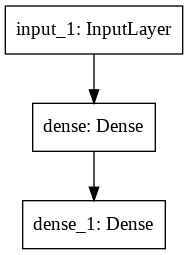

In [49]:
keras.utils.plot_model(autoencoder, "time_ytocean_autoencoder.png")

In [22]:
min_val = tf.reduce_min(test_data_train)
max_val = tf.reduce_max(test_data_train)

test_data_train = (test_data_train - min_val) / (max_val - min_val)
test_data_test = (test_data_test - min_val) / (max_val - min_val)

test_data_train = tf.cast(test_data_train, tf.float32)
test_data_test = tf.cast(test_data_test, tf.float32)


In [ ]:
epochs = 100
batch_size = 1024

history = autoencoder.fit(test_data_train, test_data_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(test_data_test, test_data_test))

In [38]:
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [39]:

class Autoencoder(Model):
  def __init__(self):
    super(Autoencoder, self).__init__()  
    self.encoder = tf.keras.Sequential([
      layers.Dense(2048, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(1024, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(1024, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(512, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(1024, activation='relu'),
      layers.Dense(1024, activation='relu'),
      layers.Dense(2048, activation='relu'),
      layers.Dense(2048, activation='relu'),
      layers.Dense(24240, activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder()

In [40]:
test_data_train

<tf.Tensor: shape=(20, 24240), dtype=float32, numpy=
array([[0.6555809 , 0.647676  , 0.6346065 , ..., 0.48695114, 0.48082277,
        0.47665882],
       [0.6991563 , 0.69675404, 0.69092417, ..., 0.56943816, 0.561973  ,
        0.55607265],
       [0.7032984 , 0.70520973, 0.70491076, ..., 0.5276422 , 0.52256304,
        0.5158781 ],
       ...,
       [0.62764454, 0.6315188 , 0.6357357 , ..., 0.50276023, 0.49659318,
        0.49763405],
       [0.68581235, 0.6855747 , 0.6843    , ..., 0.47384843, 0.46760103,
        0.46026212],
       [0.68646395, 0.680357  , 0.6746003 , ..., 0.46030685, 0.4597061 ,
        0.46505868]], dtype=float32)>

In [42]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history = autoencoder.fit(test_data_train, test_data_train,
                epochs=100,
                batch_size=512,
                validation_data=(test_data_test,test_data_test))


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.0304 - val_loss: 0.0242
Epoch 2/100
1/1 [==============================] - 1s 978ms/step - loss: 0.0248 - val_loss: 0.0284
Epoch 3/100
1/1 [==============================] - 1s 962ms/step - loss: 0.0274 - val_loss: 0.0122
Epoch 4/100
1/1 [==============================] - 1s 958ms/step - loss: 0.0115 - val_loss: 0.0941
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 0.0964 - val_loss: 0.0197
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 0.0214 - val_loss: 0.0231
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 0.0217 - val_loss: 0.0283
Epoch 8/100
1/1 [==============================] - 1s 1s/step - loss: 0.0278 - val_loss: 0.0279
Epoch 9/100
1/1 [==============================] - 1s 1s/step - loss: 0.0276 - val_loss: 0.0238
Epoch 10/100
1/1 [==============================] - 1s 1s/step - loss: 0.0233 - val_loss: 0.0126
Epoch 11/100
1/1 [============

dict_keys(['loss', 'val_loss'])


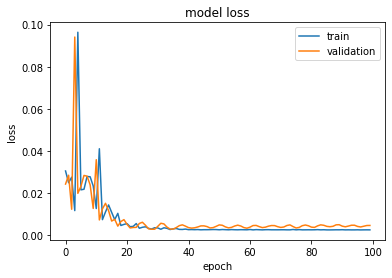

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [44]:
encoded = autoencoder.encoder(test_data).numpy()
decoded = autoencoder.decoder(encoded).numpy()


In [45]:
decoded.shape

(31, 24240)

In [46]:
decoded_data = decoded.reshape((31,101,240))

In [47]:
test_data.shape

(31, 24240)

In [50]:
decoded

nan

In [ ]:
data_array = np.array(data['eta_t'])

In [ ]:
data_a = data_array.flatten()

In [ ]:
data_a

array([        nan,         nan,         nan, ..., -0.76296276,
       -0.76296276, -0.76296276], dtype=float32)

In [ ]:
data_a = data_a[~np.isnan(data_a)]

In [ ]:
data_a.shape

(115483091,)

In [ ]:
np.array(data['eta_t'])[0]

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.82399976, -0.82399976, -0.79348123, ..., -0.82399976,
        -0.82399976, -0.82399976],
       [-0.82399976, -0.79348123, -0.79348123, ..., -0.82399976,
        -0.82399976, -0.82399976],
       [-0.76296276, -0.76296276, -0.7324442 , ..., -0.76296276,
        -0.76296276, -0.76296276]], dtype=float32)

In [ ]:
ar = np.array(data['eta_t'])


TypeError: ignored

In [ ]:
ar[0]

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.82399976, -0.82399976, -0.79348123, ..., -0.82399976,
        -0.82399976, -0.82399976],
       [-0.82399976, -0.79348123, -0.79348123, ..., -0.82399976,
        -0.82399976, -0.82399976],
       [-0.76296276, -0.76296276, -0.7324442 , ..., -0.76296276,
        -0.76296276, -0.76296276]], dtype=float32)

In [ ]:
ar.shape

(31, 1500, 3600)

In [ ]:
xt_ocean_dataset = []
basic_url = 'http://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN_2016/OFAM/ocean_eta_t_'
year = 1993
for i in range(23):
  year += 1
  month = 0
  for j in range(12):
    month += 1
    if month > 9:
      m = str(month)
    else:
      m = '0'+str(month)
    print('year: ',year,' month: ',month)
    y = str(year)
    url = basic_url + y + '_' + m + '.nc'
    data = xarray.open_dataset(url)
    xt_ocean = np.array(data['eta_t']['xt_ocean'])
    xt_ocean_dataset.append(xt_ocean)


year:  1994  month:  1
year:  1994  month:  2
year:  1994  month:  3
year:  1994  month:  4
year:  1994  month:  5
year:  1994  month:  6
year:  1994  month:  7
year:  1994  month:  8
year:  1994  month:  9
year:  1994  month:  10
year:  1994  month:  11
year:  1994  month:  12
year:  1995  month:  1
year:  1995  month:  2
year:  1995  month:  3
year:  1995  month:  4
year:  1995  month:  5
year:  1995  month:  6
year:  1995  month:  7
year:  1995  month:  8
year:  1995  month:  9
year:  1995  month:  10
year:  1995  month:  11
year:  1995  month:  12
year:  1996  month:  1
year:  1996  month:  2
year:  1996  month:  3
year:  1996  month:  4
year:  1996  month:  5
year:  1996  month:  6
year:  1996  month:  7
year:  1996  month:  8
year:  1996  month:  9
year:  1996  month:  10
year:  1996  month:  11
year:  1996  month:  12
year:  1997  month:  1
year:  1997  month:  2
year:  1997  month:  3
year:  1997  month:  4
year:  1997  month:  5
year:  1997  month:  6
year:  1997  month:  7
ye

OSError: ignored

In [ ]:
np.shape(xt_ocean_dataset)

(272, 3600)

In [ ]:
sum(xt_ocean_dataset[100]-xt_ocean_dataset[105])

0.0

In [ ]:
ocean_eta_t_list

NameError: ignored

In [ ]:
import netCDF4,xarray,glob

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = xarray.open_dataset(url)

In [ ]:
data['eta_t']['Time']

<xarray.DataArray 'Time' (Time: 31)>
array([cftime.DatetimeGregorian(2000, 1, 1, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 2, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 3, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 4, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 5, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 6, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 7, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 8, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 9, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 10, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 11, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 12, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 13, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 14, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 15, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 16, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 17, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 18, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 19, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 20, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 21, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 22, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 23, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 24, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 25, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 26, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 27, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 28, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 29, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 30, 12, 0, 0, 0),
       cftime.DatetimeGregorian(2000, 1, 31, 12, 0, 0, 0)], dtype=object)
Coordinates:
  * Time     (Time) object 2000-01-01 12:00:00 ... 2000-01-31 12:00:00
Attributes:
    long_name:       Time
    cartesian_axis:  T
    calendar_type:   GREGORIAN
    bounds:          Time_bounds

In [ ]:
xt_ocean = np.array(data['eta_t']['xt_ocean'])
yt_ocean = np.array(data['eta_t']['yt_ocean'])

NameError: ignored

In [ ]:
np.shape(xt_ocean)

(3600,)

In [ ]:
yt_ocean

array([-74.94999695, -74.84999847, -74.75      , ...,  74.75      ,
        74.84999847,  74.94999695])

array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.82399976, -0.82399976, -0.79348123, ..., -0.82399976,
         -0.82399976, -0.82399976],
        [-0.82399976, -0.79348123, -0.79348123, ..., -0.82399976,
         -0.82399976, -0.82399976],
        [-0.76296276, -0.76296276, -0.7324442 , ..., -0.76296276,
         -0.76296276, -0.76296276]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.79348123, -0.79348123, -0.79348123, ..., -

In [ ]:
data2 = netCDF4.Dataset(url)

In [ ]:
data2

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    filename: TMP/ocean_ofam_2000_01_01.nc.0000
    NumFilesInSet: 20
    title: BRAN_2016
    grid_type: regular
    grid_tile: N/A
    history: Tue Aug 30 16:45:45 2016: ncrcat -O ocean_eta_t_2000_01_01.nc ocean_eta_t_2000_01_02.nc ocean_eta_t_2000_01_03.nc ocean_eta_t_2000_01_04.nc ocean_eta_t_2000_01_05.nc ocean_eta_t_2000_01_06.nc ocean_eta_t_2000_01_07.nc ocean_eta_t_2000_01_08.nc ocean_eta_t_2000_01_09.nc ocean_eta_t_2000_01_10.nc ocean_eta_t_2000_01_11.nc ocean_eta_t_2000_01_12.nc ocean_eta_t_2000_01_13.nc ocean_eta_t_2000_01_14.nc ocean_eta_t_2000_01_15.nc ocean_eta_t_2000_01_16.nc ocean_eta_t_2000_01_17.nc ocean_eta_t_2000_01_18.nc ocean_eta_t_2000_01_19.nc ocean_eta_t_2000_01_20.nc ocean_eta_t_2000_01_21.nc ocean_eta_t_2000_01_22.nc ocean_eta_t_2000_01_23.nc ocean_eta_t_2000_01_24.nc ocean_eta_t_2000_01_25.nc ocean_eta_t_2000_01_26.nc ocean_eta_t_2000_01_27.nc ocean_eta_t_2000_01_28

In [ ]:
d = data['eta_t']

<xarray.DataArray 'eta_t' (Time: 31, yt_ocean: 1500, xt_ocean: 3600)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-0.824   , -0.793481, ..., -0.824   , -0.824   ],
        [-0.762963, -0.762963, ..., -0.762963, -0.762963]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-0.793481, -0.793481, ..., -0.824   , -0.793481],
        [-0.732444, -0.732444, ..., -0.762963, -0.732444]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-0.762963, -0.762963, ..., -0.762963, -0.762963],
        [-0.732444, -0.762963, ..., -0.732444, -0.732444]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-0.762963, -0.762963, ..., -0.762963, -0.762963],
        [-0.762963, -0.762963, ..., -0.762963, -0.762963]]], dtype=float32)
Coordinates:
  * xt_ocean  (xt_ocean) float64 0.05 0.15 0.25 0.35 ... 359.6 359.8 359.9 360.0
  * yt_ocean  (yt_ocean) float64 -74.95 -74.85 -74.75 ... 74.75 74.85 74.95
  * Time      (Time) object 2000-01-01 12:00:00 ... 2000-01-31 12:00:00
Attributes:
    long_name:      surface height on T cells [Boussinesq (volume conserving)...
    units:          meter
    valid_range:    [-32767  32767]
    packing:        4
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t

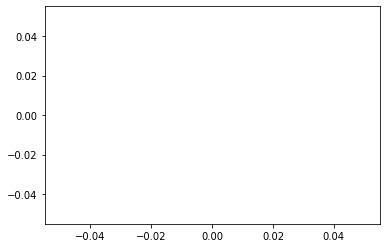

In [ ]:

plt.show()

In [ ]:
path = ["c:/users/kush/data.nc",'']
urlt = 'www.smth.com/data.nc'

In [ ]:
dataset = netCDF4.MFDataset(urls)

ValueError: ignored

In [ ]:
dataset.variables.keys()

dict_keys(['xt_ocean', 'yt_ocean', 'Time', 'nv', 'average_T1', 'average_T2', 'average_DT', 'Time_bounds', 'eta_t'])

In [ ]:
xt_ocean = dataset['xt_ocean'][:]

NameError: ignored

In [ ]:
xt_ocean

<class 'netCDF4._netCDF4.Variable'>
float64 xt_ocean(xt_ocean)
    long_name: tcell longitude
    units: degrees_E
    cartesian_axis: X
    domain_decomposition: [   1 3600    1 1800]
unlimited dimensions: 
current shape = (3600,)
filling off